<a href="https://colab.research.google.com/github/conglapgit45/Vectorized_Linear_Regression/blob/main/Vectorized_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advertising

In [193]:
# !gdown --id 1bBpjoIZ8piQ_pZyXQO9spiU8NcQH4TpK
!gdown --id 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 15.9MB/s]


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
# dataset
data = np.genfromtxt('advertising.csv', delimiter = ',', skip_header = 1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1) ), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [196]:
def stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np. random . randint (N) #In real application , you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            # Compute output
            yi_hat = np.dot(xi, thetas)

            # Compute loss li
            li = (yi_hat - yi) ** 2 / 2

            # Compute gradient for loss
            dl = (yi_hat - yi)

            # Compute gradient
            d_thetas = np.dot(xi.T, dl)

            # update theta
            thetas = thetas - learning_rate * d_thetas

            # save thetas
            thetas_path.append(thetas)

            # logging
            losses.append(li[0][0])

    return thetas_path, losses

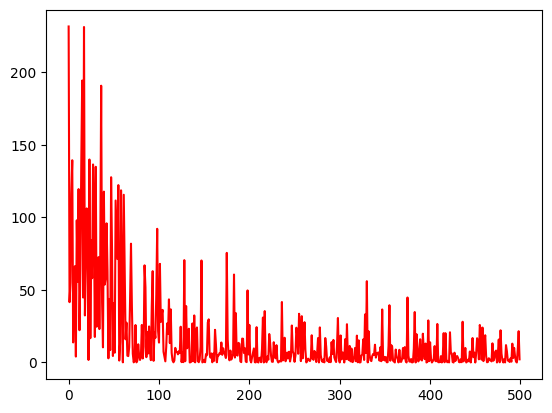

In [197]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color ="r")
plt.show()

In [198]:
# Question 1: B
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs = 1, learning_rate = 0.01)
print(np.sum(losses))

6754.643359356192


In [199]:
def mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate = 0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np. random . permutation (N) # uncomment this code for real application
        shuffled_indices = np.asarray([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # compute output
            yi_hat = np.dot(xi, thetas)

            # compute loss
            loss = (yi_hat - yi) ** 2 / 2

            # compute derivative of loss
            dl = (yi_hat - yi)

            # compute derivative of parameters
            gradients = np.dot(xi.T, dl) / minibatch_size

            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

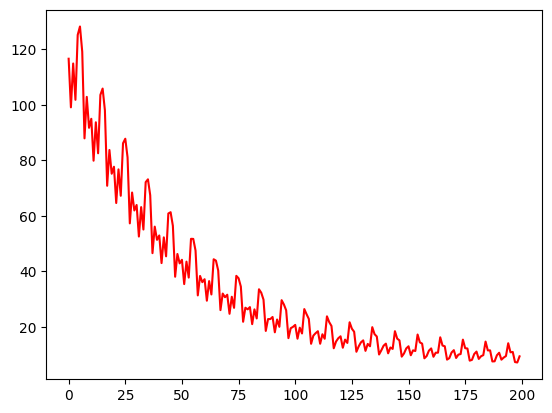

In [200]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate = 0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color ="r")
plt.show()

In [201]:
# Question 2: D
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate = 0.01)
print(round(sum(losses), 2))

8865.65


In [202]:
def batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate = 0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # compute output
        yi_hat = np.dot(X_b, thetas)

        # Compute loss
        loss = (yi_hat - y) ** 2 / 2

        # Compute losss’s derivative
        dl = (yi_hat - y)

        # Compute parameters’ derivative
        gradients = np.dot(X_b.T, dl) / N

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

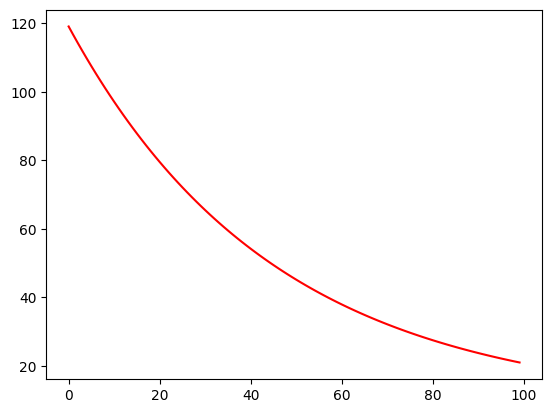

In [203]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate = 0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color ="r")
plt.show()

In [204]:
# Question 3: D
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate = 0.01)
print(round(sum(losses), 2))

5353.15


# BTC

In [205]:
!gdown --id 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 99.9MB/s]


In [206]:
# Load dataset
import pandas as pd

df = pd.read_csv('./BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


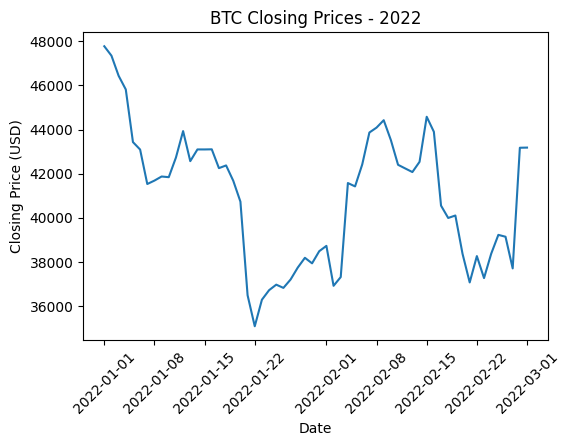

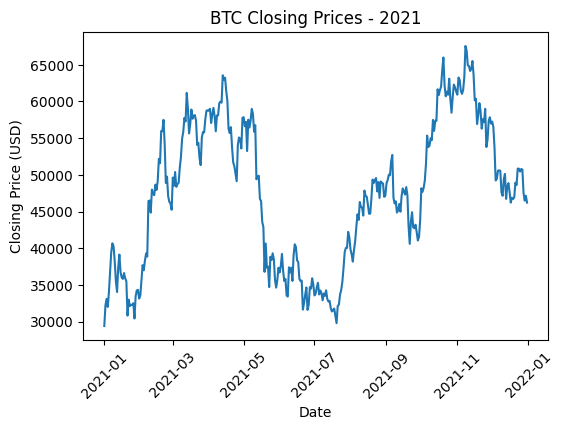

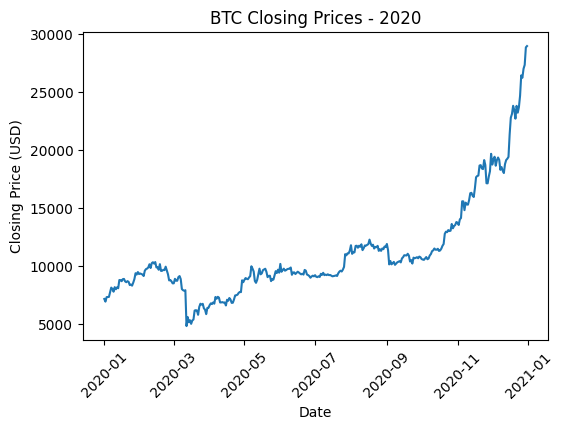

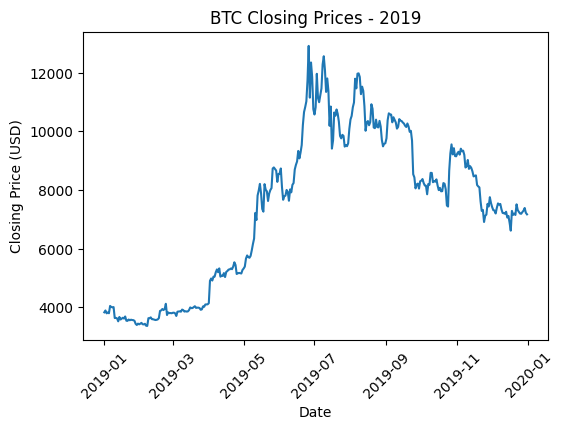

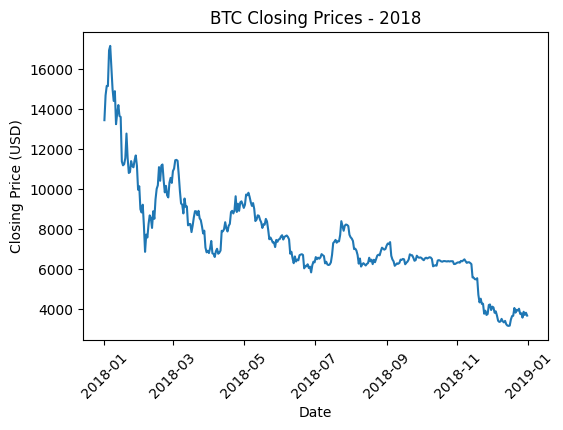

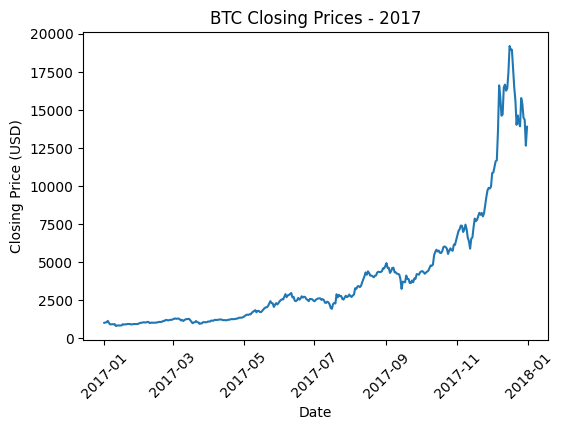

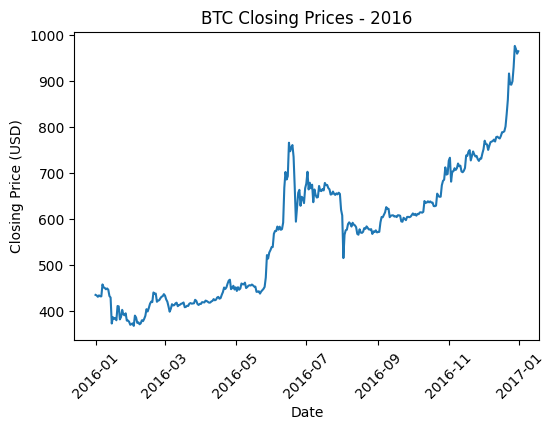

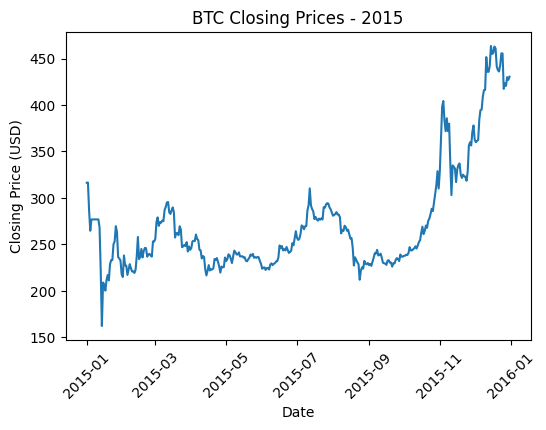

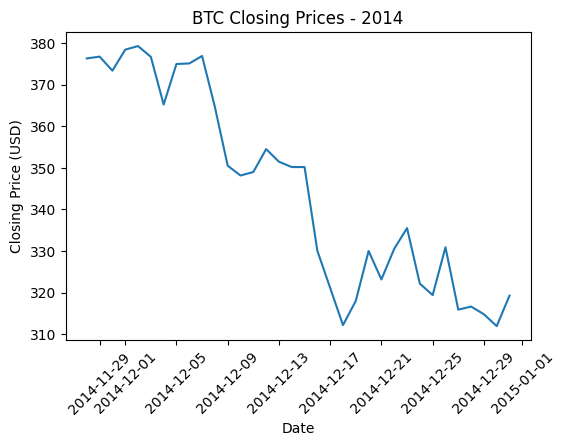

In [207]:
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

unique_years = df['date'].dt.year.unique()

for year in unique_years:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    year_month_day = df[df['year'] == year][['year', 'month', 'day']]

    merged_data = pd.merge(year_month_day, df, on = ['year', 'month', 'day'] , how = 'left')
    # Plot
    plt.figure(figsize = (6, 4))
    plt.plot(merged_data['date'], merged_data['close'])
    plt.title(f'BTC Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation = 45)
    plt.tight_layout

In [208]:
# Question 4: D

In [209]:
!pip install mplfinance

<ipython-input-210-fae93fab89b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


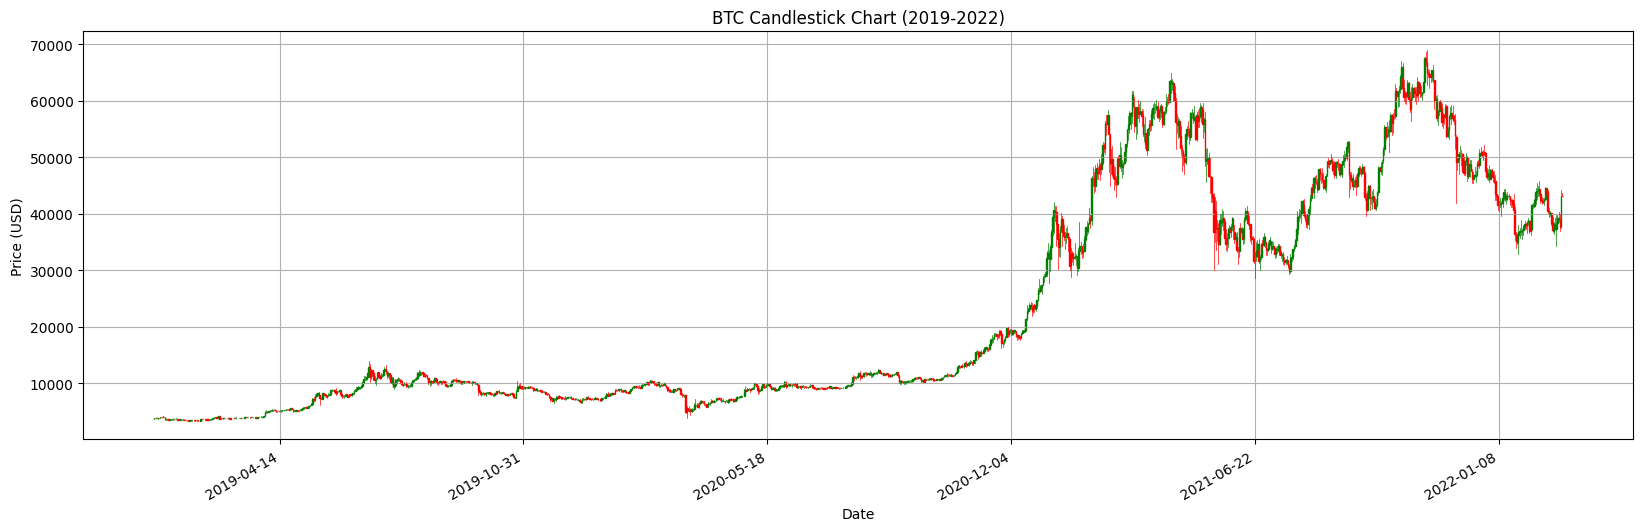

In [210]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize = (20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width = 0.6, colorup = 'g', colordown = 'r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('BTC Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('btc_candlestick_2019_2022.pdf')

plt.show()

In [227]:
# Build Linear Regression model

def predict(X, w, b):
    rs = X.dot(w) + b
    return rs

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss ** 2) / (2 * len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - dw * lr
    b_new = b - db * lr
    return (w_new, b_new)

In [212]:
# Question 5: D
# Question 6: A
# Question 7: D

In [213]:
# Standardize and split data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['open', 'high', 'low', 'close']])
scaled_df = pd.DataFrame(scaled_data, columns=['open', 'high', 'low', 'close'], index=df.index)

# Scale the features
X = scaled_df[['open', 'high', 'low']]
y = scaled_df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 , shuffle = True)

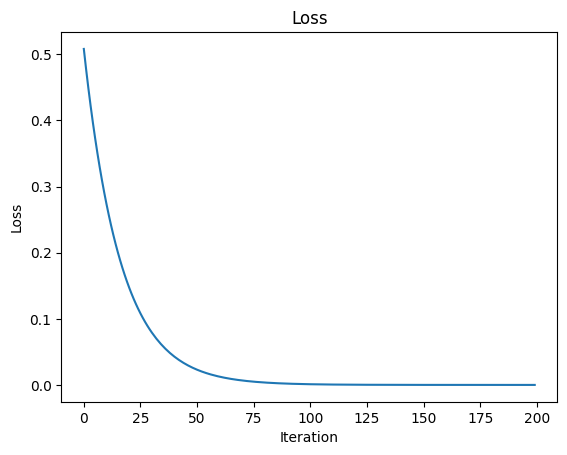

In [228]:
def linear_regression_vectorized(X, y, learning_rate = 0.01, num_iterations = 200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features) # Initialize weights
    b = 0 # Initialize bias
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)

    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train, y_train, learning_rate = 0.01, num_iterations = 200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [215]:
# Question 8: C

In [216]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


In [ ]:
# Question 9: A

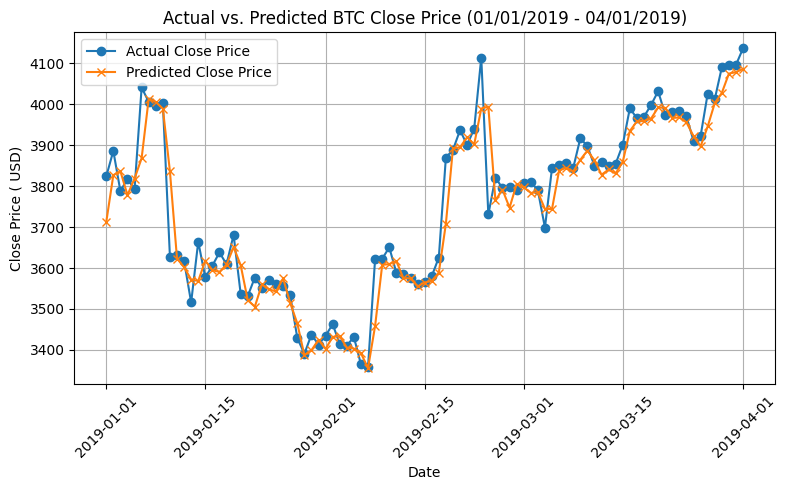

In [219]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize = (8, 5))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label = 'Actual Close Price', marker = 'o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label = 'Predicted Close Price', marker = 'x')
plt.title('Actual vs. Predicted BTC Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price ( USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()